# Sample Collection

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# Importing Dataset

In [2]:
df = pd.read_csv("Diamonds Prices2022.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


**Here are the description of the features in our dataset.**

PRICE : Diamond price in USD

CARAT : Weight of the diamond (1 carat equals 0.2 grams).

CUT : Quality of the cut (Ideal, Premium, Very Good, Good, Fair).

COLOR : Diamond colour, from D (Best) to J (Worst).

CLARITY : Measurement of how clear the diamond is (IF (Best), VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (Worst)).

DEPTH% : Measure of the depth in relation to the width of the diamond’s table, calculated as --> Depth (%) = Depth (mm) / Diameter (mm)

TABLE : Top facet of the stone; table percentage is the ratio between the table size and the diameter of the diamond

X : Length in mm

Y : Width in mm

Z : Depth in mm

# Data Cleaning

* First of all, we change all the columns heading to upper cases for better consistency and clarity.
* Looking at the dataset, `DEPTH` refers to the depth percentage in our dataset, so we added a `% ` sign to make it easier to understand. The new column heading for `DEPTH` is `DEPTH%`.

In [3]:
df.columns = df.columns.str.upper()
df.rename(columns={'DEPTH':'DEPTH%'}, inplace=True)
df

,UNNAMED: 0,CARAT,CUT,COLOR,CLARITY,DEPTH%,TABLE,PRICE,X,Y,Z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UNNAMED: 0  53943 non-null  int64  
 1   CARAT       53943 non-null  float64
 2   CUT         53943 non-null  object 
 3   COLOR       53943 non-null  object 
 4   CLARITY     53943 non-null  object 
 5   DEPTH%      53943 non-null  float64
 6   TABLE       53943 non-null  float64
 7   PRICE       53943 non-null  int64  
 8   X           53943 non-null  float64
 9   Y           53943 non-null  float64
 10  Z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

UNNAMED: 0    0
CARAT         0
CUT           0
COLOR         0
CLARITY       0
DEPTH%        0
TABLE         0
PRICE         0
X             0
Y             0
Z             0
dtype: int64

Here are some initial observations that we have:

* There are `11` columns and `53943` rows in the dataset.    
* The response variable seems to be `PRICE`, while the remaining 10 are most likely predictors.     
* There are `8` variables identified as `int64` and `float64` by default, and it seems like they are Numeric.     
* There are `3` variables identified as `object` by default, and they are most likely Categorical.      
* None of the variables/features seem to have any missing value, the null value count is 0 for all the variables.
* `UNNANMED: 0` column is unecessary as it is just the index.

# Removing unnecessary columns and rows

We realised that the first column `UNNAMED: 0` is not needed, so we use the drop function to remove the column.

In [6]:
df = df.drop("UNNAMED: 0", axis = 1)
df

,CARAT,CUT,COLOR,CLARITY,DEPTH%,TABLE,PRICE,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [7]:
df.describe()

,CARAT,DEPTH%,TABLE,PRICE,X,Y,Z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From the data description table above, we notice that:

* The minimum value of `X`,`Y` and `Z` is 0, this means that there exists faulty data since a 0 in any of the three variables.
* This means that the diamond is not 3-dimensional.
* So, we remove rows with `X = 0` or `Y = 0` or `Z = 0`.


In [8]:
df = df[(df['X']!=0) & (df['Y']!=0) & (df['Z']!=0)]
df

,CARAT,CUT,COLOR,CLARITY,DEPTH%,TABLE,PRICE,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


After dropping, we are left with 53923 rows, compared to 53943 rows before dropping. 
We have dropped 20 rows here.
The dataset now have `10` columns and `53923` rows.

In [9]:
df.describe()

,CARAT,DEPTH%,TABLE,PRICE,X,Y,Z
count,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000
mean,0.797693,61.749432,57.456902,3930.927879,5.731628,5.734888,3.540042
std,0.473783,1.432336,2.234123,3987.179153,1.119392,1.140094,0.702511
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Now, `X`, `Y` and `Z` has no more 0 values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53923 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CARAT    53923 non-null  float64
 1   CUT      53923 non-null  object 
 2   COLOR    53923 non-null  object 
 3   CLARITY  53923 non-null  object 
 4   DEPTH%   53923 non-null  float64
 5   TABLE    53923 non-null  float64
 6   PRICE    53923 non-null  int64  
 7   X        53923 non-null  float64
 8   Y        53923 non-null  float64
 9   Z        53923 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Here, we move the `PRICE` to the last column so that it is easier for us to perform EDA later

In [11]:
df = df[['CUT','COLOR','CLARITY','CARAT','DEPTH%','TABLE','X', 'Y', 'Z', 'PRICE']]
df

,CUT,COLOR,CLARITY,CARAT,DEPTH%,TABLE,X,Y,Z,PRICE
0,Ideal,E,SI2,0.23,61.5,55.0,3.95,3.98,2.43,326
1,Premium,E,SI1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,Good,E,VS1,0.23,56.9,65.0,4.05,4.07,2.31,327
3,Premium,I,VS2,0.29,62.4,58.0,4.20,4.23,2.63,334
4,Good,J,SI2,0.31,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53938,Premium,H,SI2,0.86,61.0,58.0,6.15,6.12,3.74,2757
53939,Ideal,D,SI2,0.75,62.2,55.0,5.83,5.87,3.64,2757
53940,Premium,E,SI1,0.71,60.5,55.0,5.79,5.74,3.49,2756
53941,Premium,F,SI1,0.71,59.8,62.0,5.74,5.73,3.43,2756


# Preliminary EDA #

This is done to check if our dataset can be suitable to further carry on with our project.

In [12]:
sb.set(font_scale=1.5, style='whitegrid')

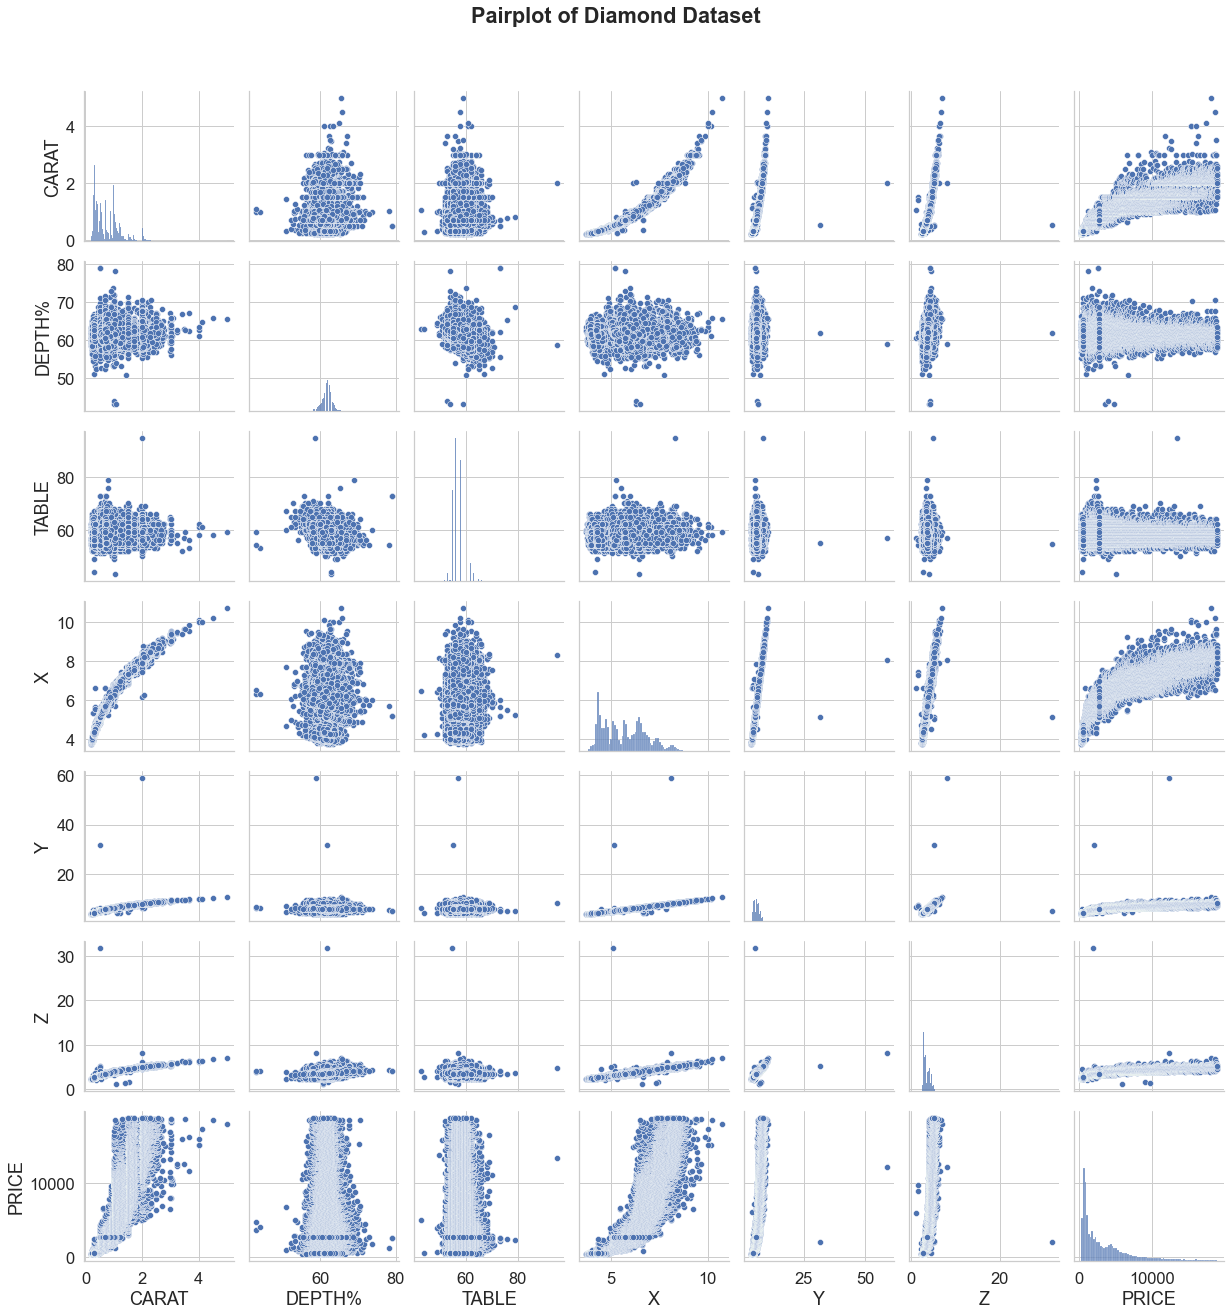

In [13]:
sb.pairplot(data=df)
plt.suptitle('Pairplot of Diamond Dataset', fontweight='bold', y=1.05)
plt.show()

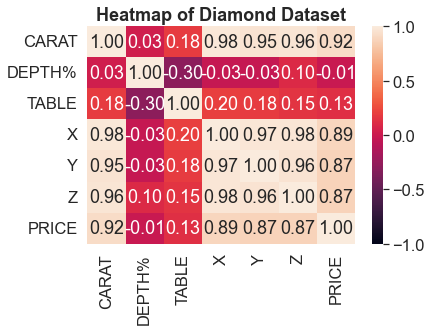

In [14]:
sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap of Diamond Dataset', fontweight='bold')
plt.show()

* From the pairplot, we observed that outliers exist in this dataset, `X` and `CARAT` seems to have a linear relationship with `PRICE`.
* From the heatmap, we can see that `CARAT`, `X`, `Y` and `Z` have a very strong correlation to the `PRICE` of the diamond, theremore, they could be good predictors to predict the price of diamond.

# Removing Outliers

From the pairplot above, we noticed that there are outliers in our dataset. Therefore, we use boxplotS to help us better visualize the outliers

In [15]:
sb.set(font_scale=2.5, style='whitegrid')

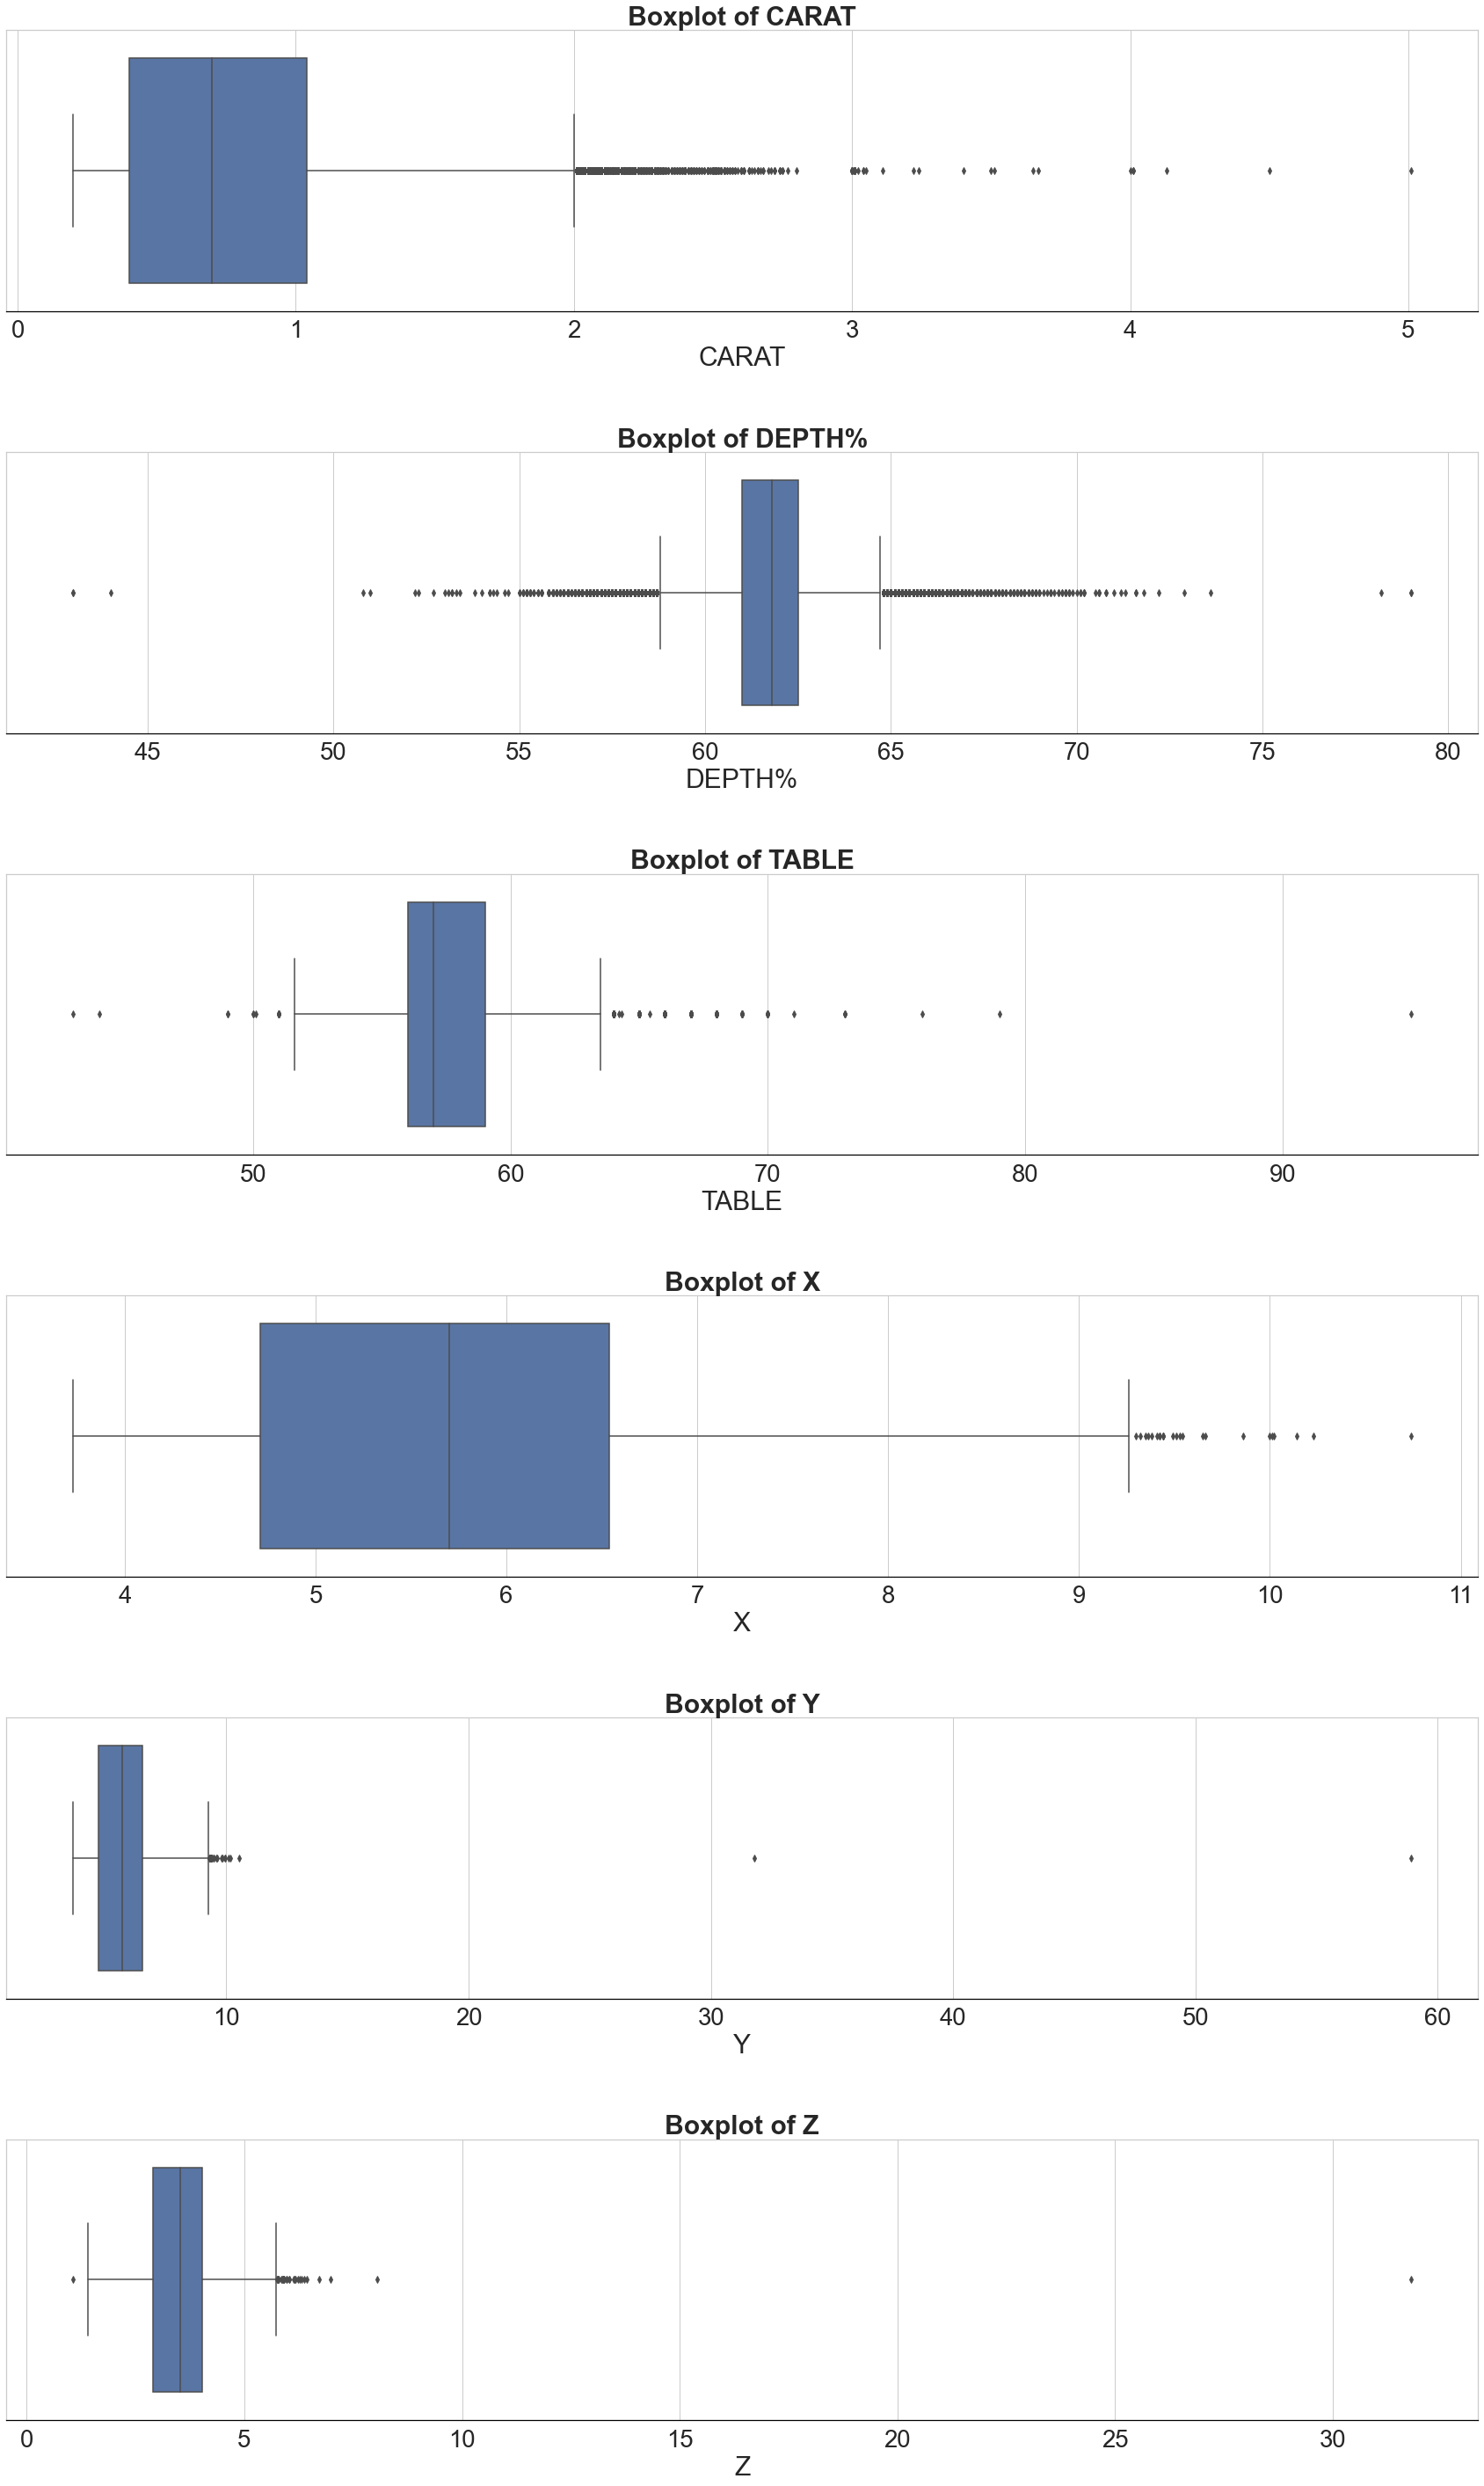

In [16]:
f, ax = plt.subplots(6, 1, figsize=(30, 50))

sb.boxplot(x='CARAT', data=df, ax=ax[0]).spines['bottom'].set_color('black')
ax[0].set_title("Boxplot of CARAT", fontweight='bold')

sb.boxplot(x='DEPTH%', data=df, ax=ax[1]).spines['bottom'].set_color('black')
ax[1].set_title("Boxplot of DEPTH%", fontweight='bold')

sb.boxplot(x='TABLE', data=df, ax=ax[2]).spines['bottom'].set_color('black')
ax[2].set_title("Boxplot of TABLE", fontweight='bold')

sb.boxplot(x='X', data=df, ax=ax[3]).spines['bottom'].set_color('black')
ax[3].set_title("Boxplot of X", fontweight='bold')

sb.boxplot(x='Y', data=df, ax=ax[4]).spines['bottom'].set_color('black')
ax[4].set_title("Boxplot of Y", fontweight='bold')

sb.boxplot(x='Z', data=df, ax=ax[5]).spines['bottom'].set_color('black')
ax[5].set_title("Boxplot of Z", fontweight='bold')

plt.subplots_adjust(hspace=0.5)

plt.show()

We can clearly visualize the outliers when we plot out the boxplot. 
Therefore, we remove all the outliers from our dataset using the IQR method.

# Removal of Outliers using the Interquartile Range Method

In [17]:
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    new_df = df.drop(df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)].index)
    return new_df

df = remove_outliers(df, 'CARAT')
df = remove_outliers(df, 'X')
df = remove_outliers(df, 'Y')
df = remove_outliers(df, 'Z')
df = remove_outliers(df, 'DEPTH%')
df = remove_outliers(df, 'TABLE')
df

,CUT,COLOR,CLARITY,CARAT,DEPTH%,TABLE,X,Y,Z,PRICE
0,Ideal,E,SI2,0.23,61.5,55.0,3.95,3.98,2.43,326
1,Premium,E,SI1,0.21,59.8,61.0,3.89,3.84,2.31,326
3,Premium,I,VS2,0.29,62.4,58.0,4.20,4.23,2.63,334
4,Good,J,SI2,0.31,63.3,58.0,4.34,4.35,2.75,335
5,Very Good,J,VVS2,0.24,62.8,57.0,3.94,3.96,2.48,336
...,...,...,...,...,...,...,...,...,...,...
53938,Premium,H,SI2,0.86,61.0,58.0,6.15,6.12,3.74,2757
53939,Ideal,D,SI2,0.75,62.2,55.0,5.83,5.87,3.64,2757
53940,Premium,E,SI1,0.71,60.5,55.0,5.79,5.74,3.49,2756
53941,Premium,F,SI1,0.71,59.8,62.0,5.74,5.73,3.43,2756


After removal of outliers, the number of rows decreased from 53923 to 48901 rows.

There are `10` columns and `48901` rows in the dataset now.

# Main EDA


To further ensure that there is no more outliers, we plot boxplots again.

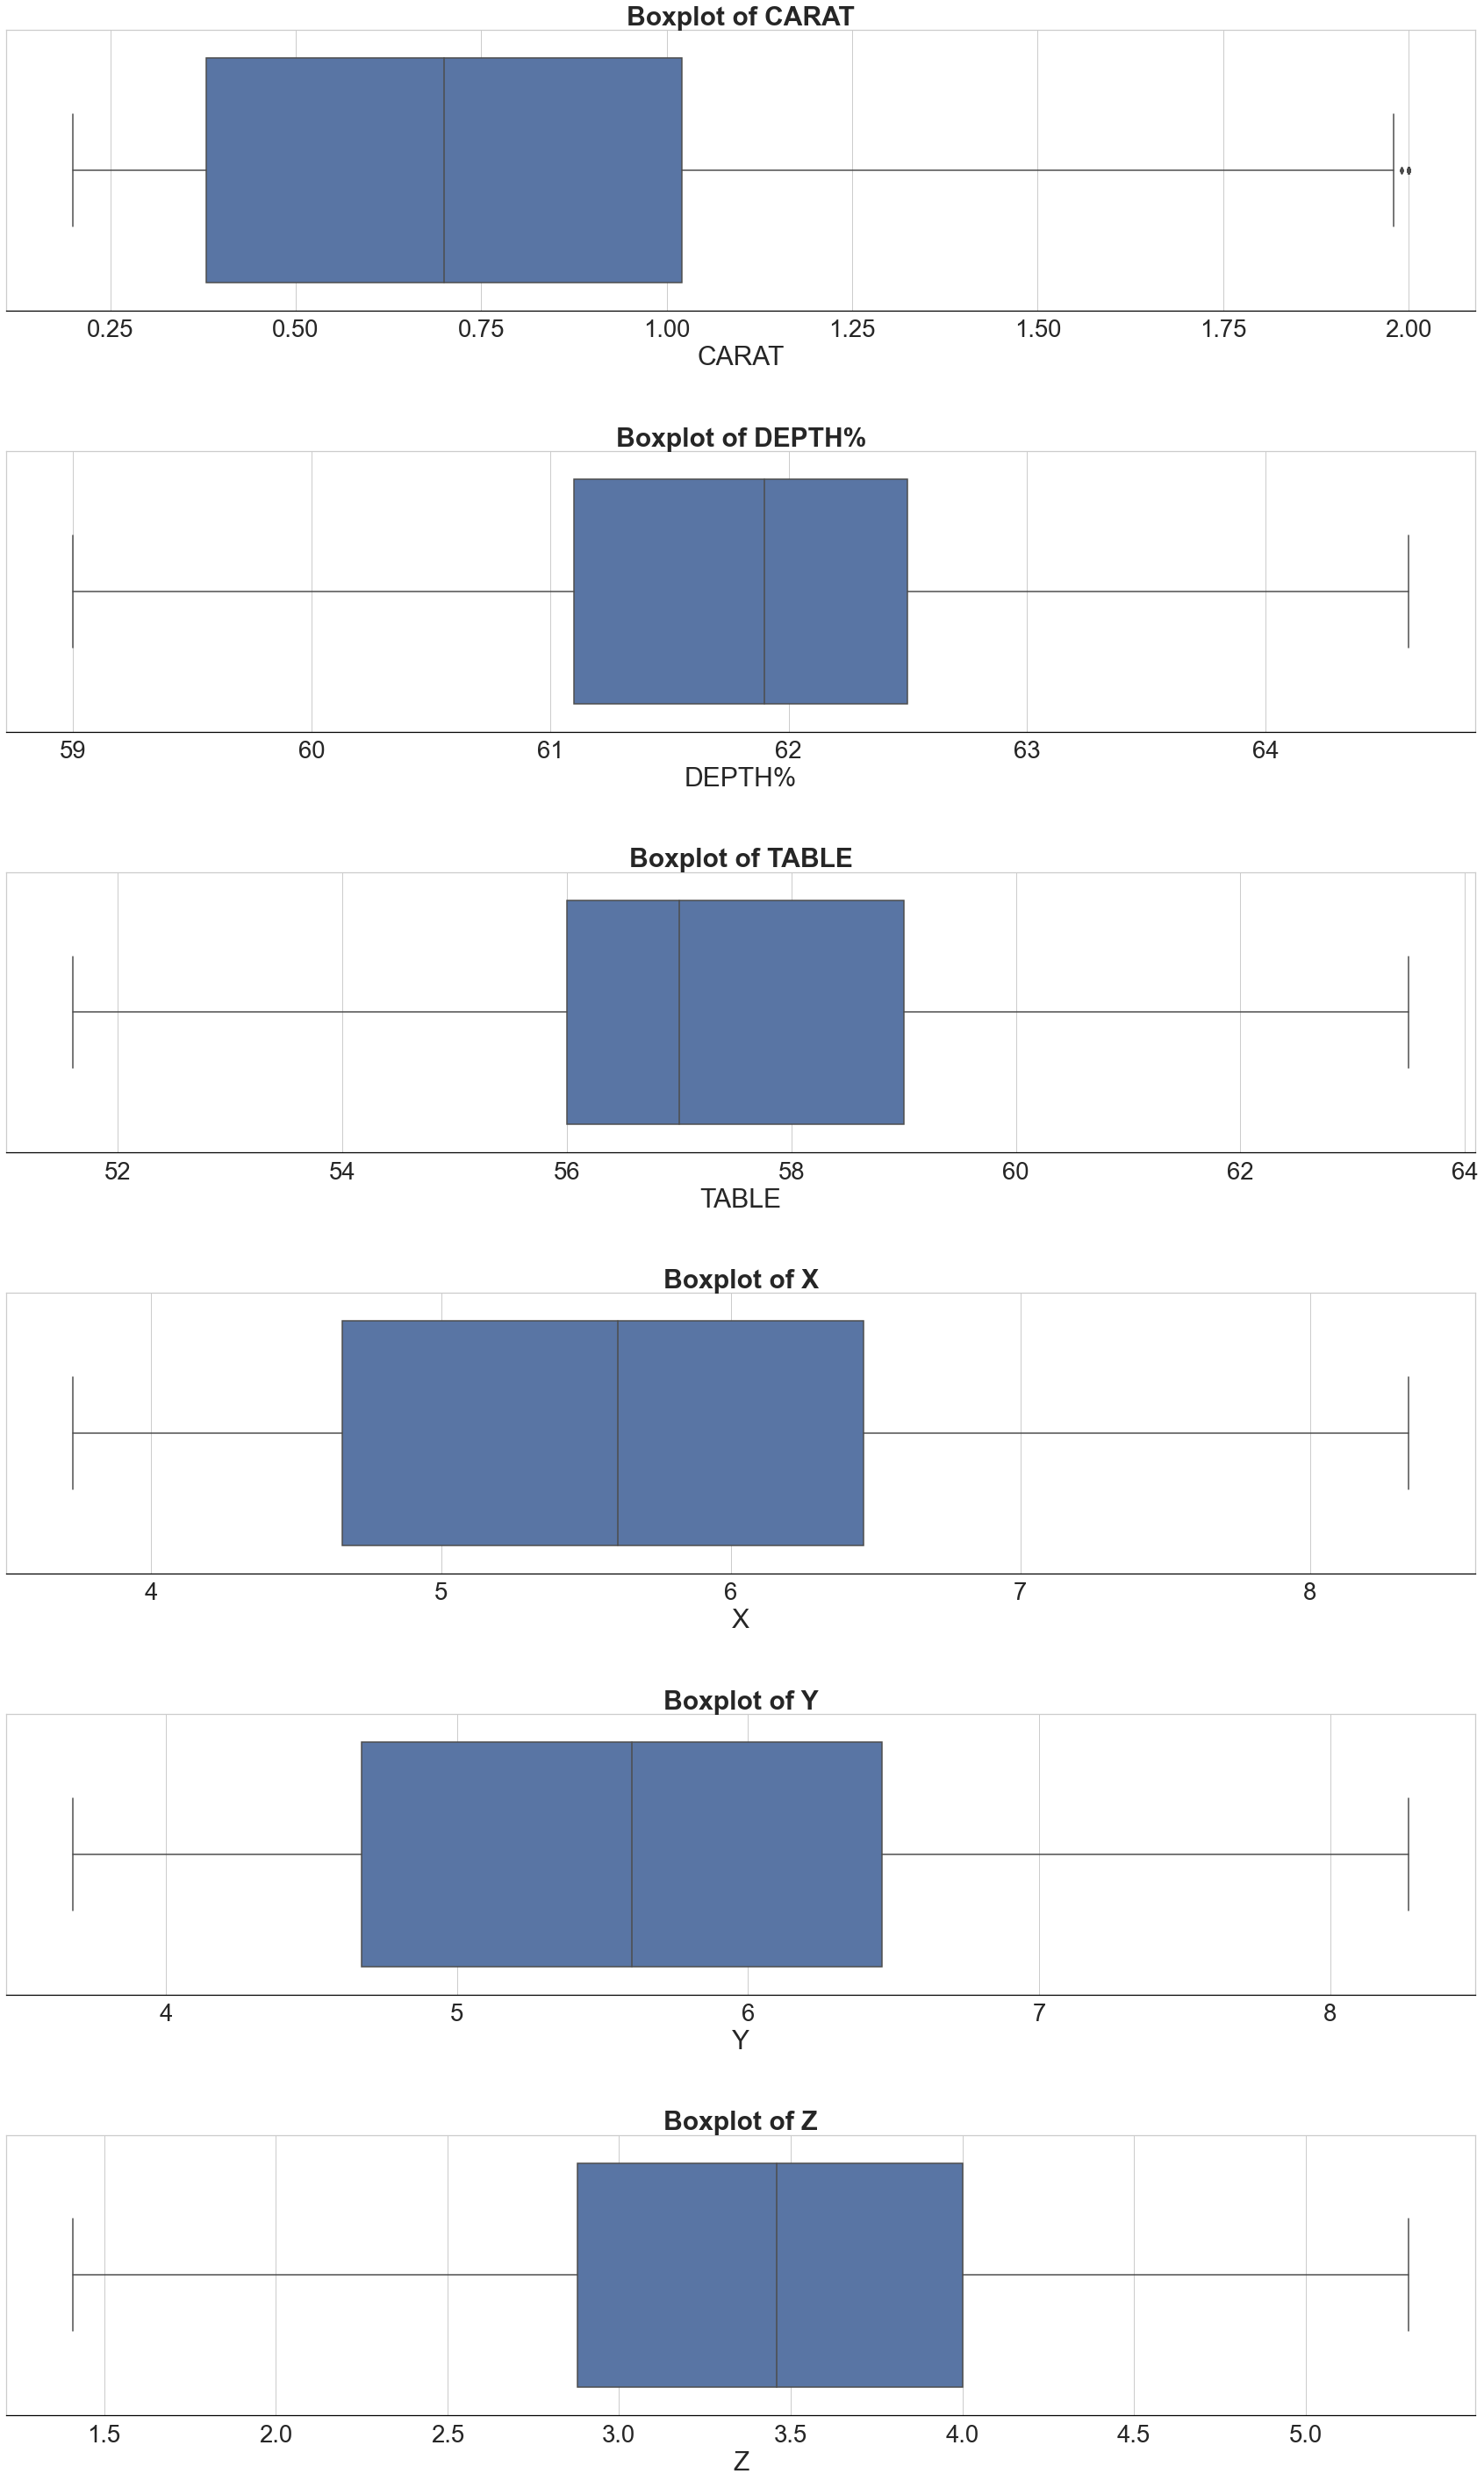

In [18]:
f, ax = plt.subplots(6, 1, figsize=(30, 50))

sb.boxplot(x='CARAT', data=df, ax=ax[0]).spines['bottom'].set_color('black')
ax[0].set_title("Boxplot of CARAT", fontweight='bold')

sb.boxplot(x='DEPTH%', data=df, ax=ax[1]).spines['bottom'].set_color('black')
ax[1].set_title("Boxplot of DEPTH%", fontweight='bold')

sb.boxplot(x='TABLE', data=df, ax=ax[2]).spines['bottom'].set_color('black')
ax[2].set_title("Boxplot of TABLE", fontweight='bold')

sb.boxplot(x='X', data=df, ax=ax[3]).spines['bottom'].set_color('black')
ax[3].set_title("Boxplot of X", fontweight='bold')

sb.boxplot(x='Y', data=df, ax=ax[4]).spines['bottom'].set_color('black')
ax[4].set_title("Boxplot of Y", fontweight='bold')

sb.boxplot(x='Z', data=df, ax=ax[5]).spines['bottom'].set_color('black')
ax[5].set_title("Boxplot of Z", fontweight='bold')

plt.subplots_adjust(hspace=0.5)

plt.show()

From the plots above, we can see that all the outliers have been removed.

In [19]:
sb.set(font_scale=1.5, style='whitegrid')

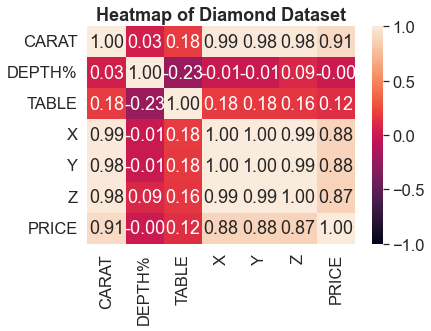

In [20]:
sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap of Diamond Dataset', fontweight='bold')
plt.show()

Looking at the last row of the heatmap, we can see all the correlation coefficient between variables and `PRICE`.

* After outliers removal, the heatmap shows that `CARAT`, `X`, `Y` and `Z` have a very strong correlation with `PRICE`.
* The correlations coefficients are `0.91`, `0.88`, `0.88` and `0.87` respectively.
* `DEPTH%` and `TABLE` have a very low correlation with `PRICE`, `0` and `0.12` respectively. 

# Categorical data

We first sort the categories from best to worst.

In [21]:
new_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
df.loc[:, 'CUT'] = pd.Categorical(df['CUT'], categories=new_order, ordered=True)

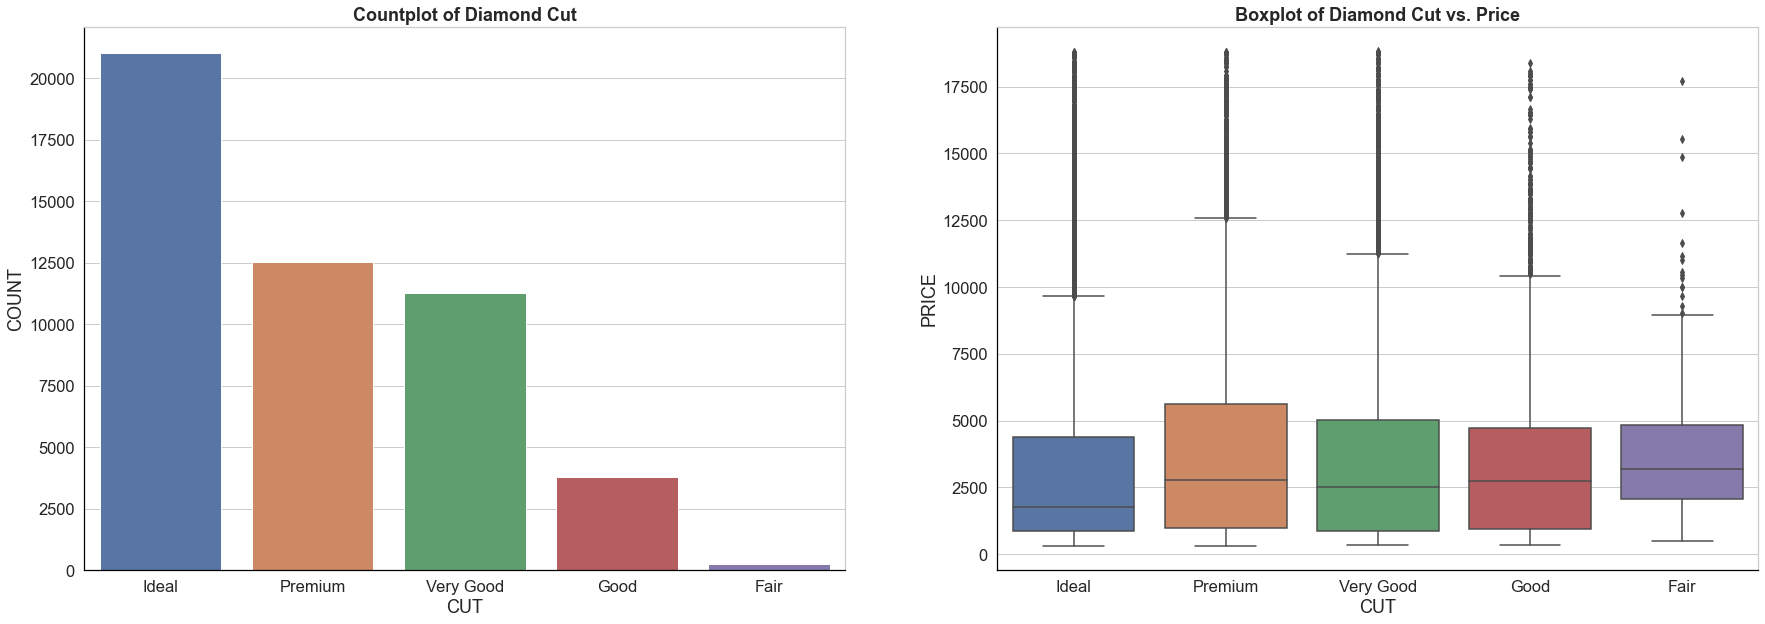

In [22]:

f, ax = plt.subplots(1,2, figsize=(30,10))

sb.countplot(x='CUT', data=df, ax=ax[0])
ax[0].spines['left'].set_color('black')
ax[0].spines['bottom'].set_color('black')
ax[0].set_title('Countplot of Diamond Cut', fontweight='bold')
ax[0].set_ylabel('COUNT')

sb.boxplot(x='CUT', y='PRICE', data=df, ax=ax[1])
ax[1].spines['left'].set_color('black')
ax[1].spines['bottom'].set_color('black')
ax[1].set_title('Boxplot of Diamond Cut vs. Price', fontweight='bold')

plt.show()

* `Ideal` cuts have the highest frequency, `Fair` has the lowest.

* `Premium` cuts have the highest price.

From this countplot, we can observe that the diamond cut is biased towards `Ideal` class as the frequecy is the highest. 

In [23]:
new_order1 = ['D','E','F','G','H','I','J']

df['COLOR'] = pd.Categorical(df['COLOR'], categories=new_order1, ordered=True)

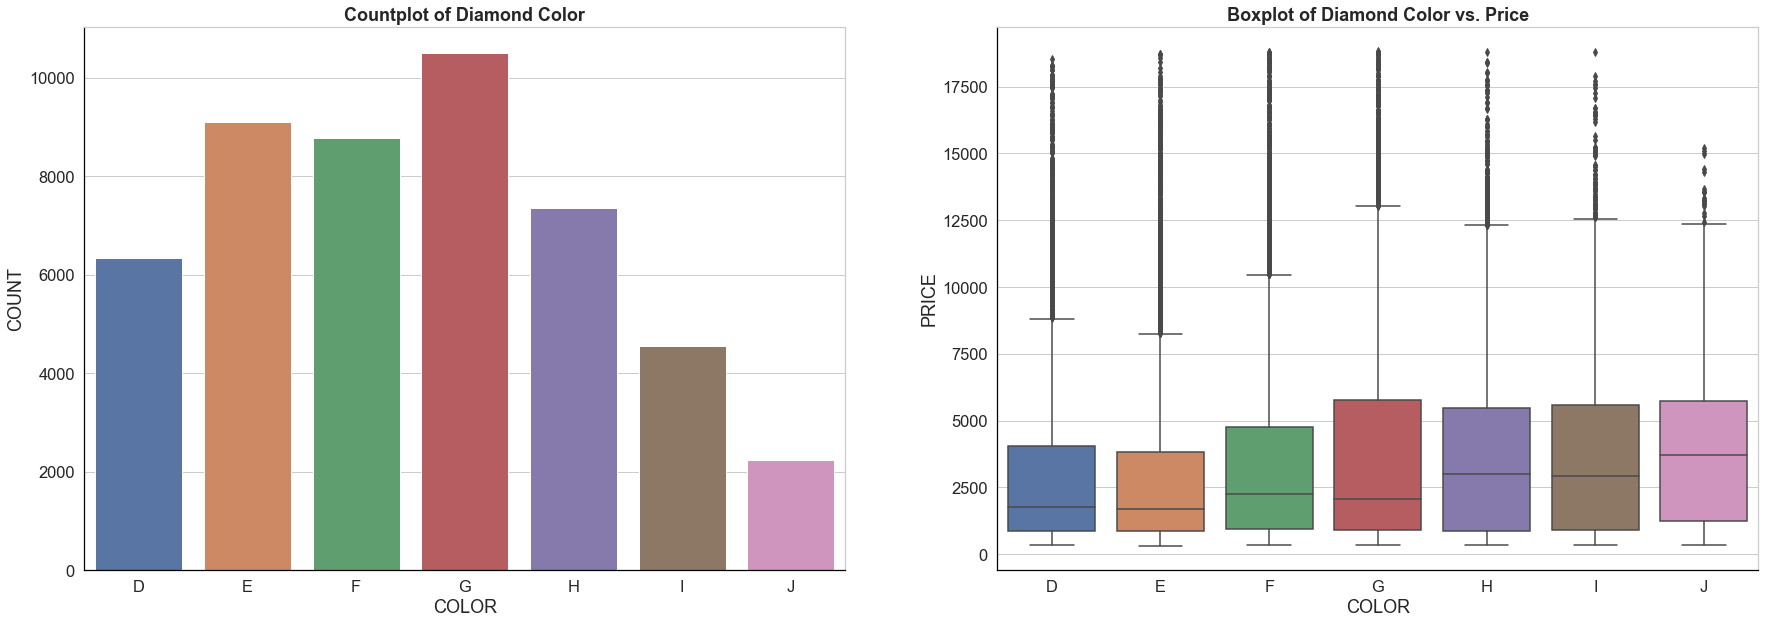

In [24]:
f, ax = plt.subplots(1,2, figsize=(30,10))

sb.countplot(x='COLOR', data=df, ax=ax[0])
ax[0].spines['left'].set_color('black')
ax[0].spines['bottom'].set_color('black')
ax[0].set_title('Countplot of Diamond Color', fontweight='bold')
ax[0].set_ylabel('COUNT')

sb.boxplot(x='COLOR', y='PRICE', data=df, ax=ax[1])
ax[1].spines['left'].set_color('black')
ax[1].spines['bottom'].set_color('black')
ax[1].set_title('Boxplot of Diamond Color vs. Price', fontweight='bold')

plt.show()

* `J` has the lowest frequency, but it has a high price.
* `G` is the most common color with the highest frequency.

In [25]:
new_order2 = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']


df['CLARITY'] = pd.Categorical(df['CLARITY'], categories=new_order2, ordered=True)



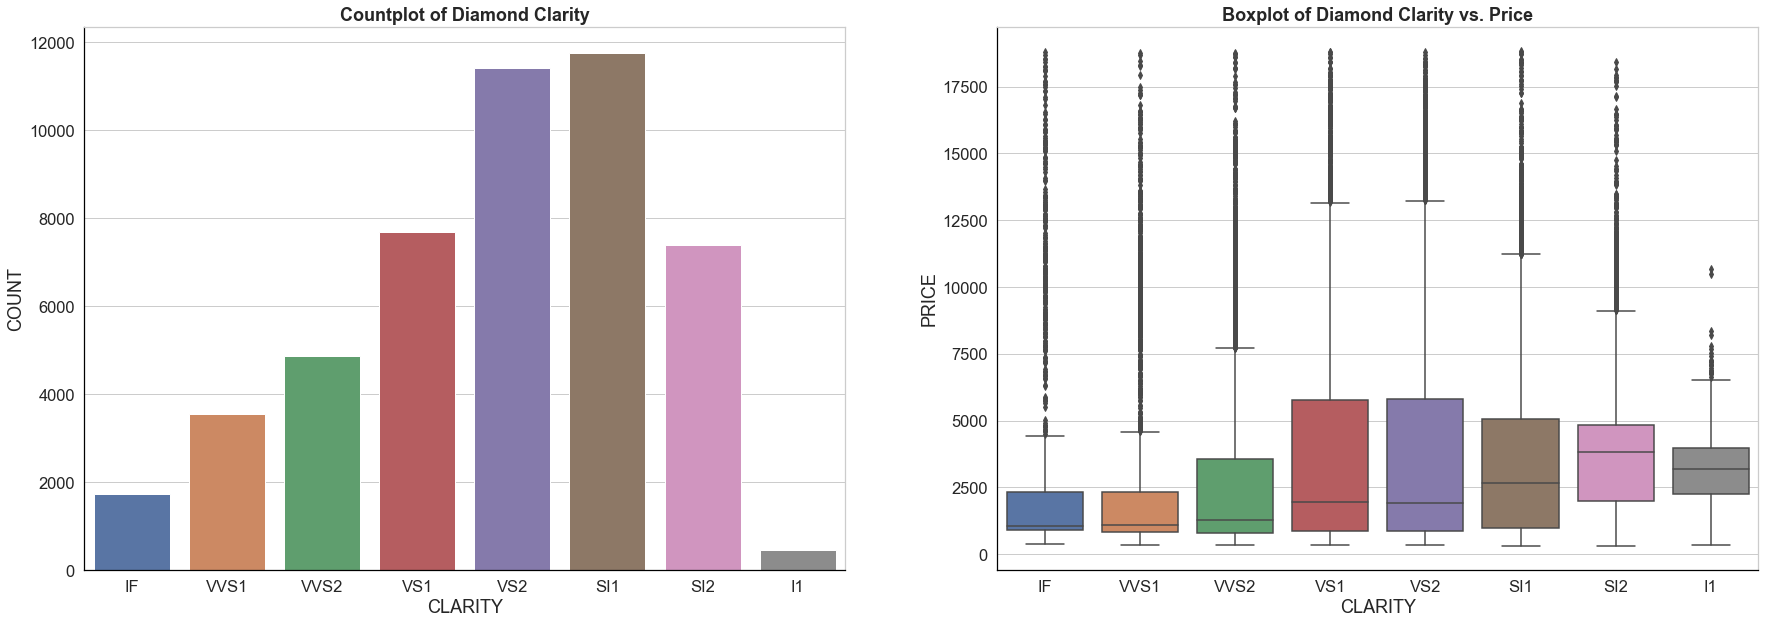

In [26]:
f, ax = plt.subplots(1,2, figsize=(30,10))

sb.countplot(x='CLARITY', data=df, ax=ax[0])
ax[0].spines['left'].set_color('black')
ax[0].spines['bottom'].set_color('black')
ax[0].set_title('Countplot of Diamond Clarity', fontweight='bold')
ax[0].set_ylabel('COUNT')

sb.boxplot(x='CLARITY', y='PRICE', data=df, ax=ax[1])
ax[1].spines['left'].set_color('black')
ax[1].spines['bottom'].set_color('black')
ax[1].set_title('Boxplot of Diamond Clarity vs. Price', fontweight='bold')

plt.show()

* `SI1` grade has the highest frequency
* `L1` grade has the lowest frequency, followed by `IF`.

From the graph we can see that diamonds with these characteristics are preferred.

Characteristics:

* `CUT`     : `Ideal`
* `COLOR`   : `G`
* `CLARITY` : `SI1`

In [27]:
dfnum = df[['CARAT','PRICE']]
dfcat = df[['CUT','COLOR','CLARITY','PRICE']]

In [28]:
dfnum.count()

CARAT    48901
PRICE    48901
dtype: int64

In [29]:
dfcat.count()

CUT        48901
COLOR      48901
CLARITY    48901
PRICE      48901
dtype: int64

In [66]:
from IPython.display import Image, display, HTML

display(HTML("<div style='text-align:center'><h1><b>Diamond Grading Report</b></h1></div>"))
![](Dataset/diamond grading.jpg)


Above is an example of a grading report that consumers can find in the certificate of the diamond that they want to purchase.

We can clearly see that:

* Only information of  `CARAT`, `COLOR`, `CLARITY` and `CUT` are available for consumers.
* Data such as `DEPTH%`, `TABLE` and the measurements of `X`, `Y` and `Z` is not readily available for consumers.

From the heatmap above, we know that `DEPTH%` and `TABLE` have very low correlation to `PRICE`, with a correlation coefficient of `0` and `0.12` respectively.

After real-life considerations of the information given to consumers and based on our EDA results, we decided to drop `DEPTH%`, `TABLE`, `X`, `Y` and `Z` from our dataset.


Below is our new numerical dataframe.

In [31]:
dfnum = dfnum[['CARAT','PRICE']]
dfnum

,CARAT,PRICE
0,0.23,326
1,0.21,326
3,0.29,334
4,0.31,335
5,0.24,336
...,...,...
53938,0.86,2757
53939,0.75,2757
53940,0.71,2756
53941,0.71,2756


# Converting to 1NF (encoding of categorical variable data)

Since we have 3 columns with categorical values and ML regression model only work with numbers. We used the `label encoding`.

Firstly, the reason to use `label encoding` is our categorical data(cut,clarity and colour) are ordinal data which means there are discrete values which shows levels in the data(example: best to worst). Thus , `label encoding` is the most suitable for that. (as it coverts the levels in words into numbers (1,2,3,4..) which gives us a clear view of the data.

We could have used other encoding like `one hot encoding`. But since we had only 3 columns with categorical values and these columns has only 5-6 discrete levels. This might be hard for us to visualise the data frame as it will create many columns for each categorical variables to show the different levels.

Things could work with one hot encode but it will just increase the processing power and we have already 50,000 plus rows we don’t want to stress out our processor when we can achieve results with label encoding with relatively less processing requirements.

In [32]:
# using label encoding

le=preprocessing.LabelEncoder()

In [33]:
dfcat['CUT'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [34]:
dfcat['CUT']=le.fit_transform(dfcat['CUT'])

C:\Users\WuJi\AppData\Local\Temp\ipykernel_16016\3280135091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['CUT']=le.fit_transform(dfcat['CUT'])


In [35]:
dfcat['CUT'].unique()

array([2, 3, 1, 4, 0])

As we can see, the levels ( Ideal,Premium, Very Good,..) have been changed to (2,3,1...). This this label encoding.

This format is followed for clarity and colour as well.

After doing this, we can use it in our machine learning models.

In [36]:
dfcat['CLARITY'].unique()

['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF']
Categories (8, object): ['IF' < 'VVS1' < 'VVS2' < 'VS1' < 'VS2' < 'SI1' < 'SI2' < 'I1']

In [37]:
dfcat['CLARITY']=le.fit_transform(df['CLARITY'])

C:\Users\WuJi\AppData\Local\Temp\ipykernel_16016\1956344815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['CLARITY']=le.fit_transform(df['CLARITY'])


In [38]:
dfcat['CLARITY'].unique()

array([3, 2, 5, 7, 6, 4, 0, 1])

In [39]:
dfcat['COLOR']=le.fit_transform(df['COLOR'])

C:\Users\WuJi\AppData\Local\Temp\ipykernel_16016\1196308927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['COLOR']=le.fit_transform(df['COLOR'])


### After Label Encoding of categorical variables ##

In [40]:
dfcat.head(30)

,CUT,COLOR,CLARITY,PRICE
0,2,1,3,326
1,3,1,2,326
3,3,5,5,334
4,1,6,3,335
5,4,6,7,336
6,4,5,6,336
7,4,4,2,337
9,4,4,4,338
10,1,6,2,339
11,2,6,4,340


In [41]:
dfnum = dfnum.drop(columns=['PRICE'])

#### Adding the numeric variable columns and categorical variable columns together for machine learning to be used as predictor variables ###

In [42]:
fulldf = pd.concat([dfnum, dfcat], axis="columns")

In [43]:
fulldf.head()

,CARAT,CUT,COLOR,CLARITY,PRICE
0,0.23,2,1,3,326
1,0.21,3,1,2,326
3,0.29,3,5,5,334
4,0.31,1,6,3,335
5,0.24,4,6,7,336


## Model Creation using the data we have sorted ##

Here, we will be trying to come up with different models using linear regression and random forest regression. 

In [44]:
x=fulldf.drop([ 'PRICE'],axis=1)

In [45]:
x.head()

,CARAT,CUT,COLOR,CLARITY
0,0.23,2,1,3
1,0.21,3,1,2
3,0.29,3,5,5
4,0.31,1,6,3
5,0.24,4,6,7


In [46]:
x.iloc[:,0].isna()


0        False
1        False
3        False
4        False
5        False
         ...  
53938    False
53939    False
53940    False
53941    False
53942    False
Name: CARAT, Length: 48901, dtype: bool

### The price variable is the response variable for our model as we are trying to predict it using our models ###

In [47]:
y=fulldf['PRICE']

In [48]:
x.isnull().sum()

CARAT      0
CUT        0
COLOR      0
CLARITY    0
dtype: int64

**In the next notebook (Mini Project - Machine Learning), we will cover how the Machine Learning is implemented to predict the diamond price**